In [ ]:
# importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import os
from os import listdir

In [ ]:
# mounting drive to get data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path of the train set
images_path = "/content/drive/MyDrive/Project/Data/Dataset/"

In [ ]:
# getting train and train cleaned images from folder
dirty_images_path = [images_path + 'train/' + f for f in os.listdir(images_path + 'train/')]
dirty_images_path.sort()
clean_images_path = [images_path + 'train_cleaned/' + f for f in os.listdir(images_path + 'train_cleaned/')]
clean_images_path.sort()
# getting the test files path
test_images_path = [images_path + 'test/' + f for f in os.listdir(images_path + 'test/')]
number_of_train_images = len(dirty_images_path)
number_of_test_images = len(test_images_path)

In [ ]:
# define row and col
width, height = 540, 420

In [ ]:
# function for reading images
def read_images(image_paths):
    images = []
    for image_path in image_paths:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (width, height))
        # image = image.astype('float32') / 255.0
        images.append(image)
    return np.array(images)

In [ ]:
# reading train images as np_arrays
train_dirty_images = read_images(dirty_images_path)
train_clean_images = read_images(clean_images_path)

In [ ]:
# function for showing the images
def plot_image(image1, image2):
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.imshow(image1, cmap = 'gray')
  plt.subplot(1,2,2)
  plt.imshow(image2, cmap = 'gray')
  plt.show()

In [ ]:
# getting test data
test_images = read_images(test_images_path)

In [ ]:
# thresholding
window_size = 11
offset = 25

In [ ]:
def thresholding(image):
  # create an empty array
  denoised_pixels = np.zeros_like(image)

  # Loop over every pixel in the image
  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          # calculate the local mean value
          left = max(i - window_size//2, 0)
          right = min(i + window_size//2, image.shape[0] - 1)
          top = max(j - window_size//2, 0)
          bot = min(j + window_size//2, image.shape[1] - 1)
          window = image[left:right+1, top:bot+1]
          local_mean = np.mean(window)
          
          # calculate the threshold value
          threshold = local_mean - offset
          
          # Set the denoised pixel value to either 0 or 1
          if image[i,j] < threshold:
              denoised_pixels[i,j] = 0
          else:
              denoised_pixels[i,j] = 255
  return denoised_pixels

In [ ]:
!pip install sewar
from sewar.full_ref import uqi, psnr, rmse, ssim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
image_d = cv2.imread('/content/drive/MyDrive/Project/Data/Dataset/train/99.png', cv2.IMREAD_GRAYSCALE)
image_c = cv2.imread('/content/drive/MyDrive/Project/Data/Dataset/train_cleaned/99.png', cv2.IMREAD_GRAYSCALE)
denoised_image = thresholding(image_d)
print("RMSE: ", rmse(image_c, denoised_image)) #RMSE
print("UQI: ", uqi(image_c, denoised_image)) #UQI
print("PSNR: ", psnr(image_c, denoised_image)) #PSNR

RMSE:  35.66230434925817
UQI:  0.9844443594559977
PSNR:  17.086615567824055


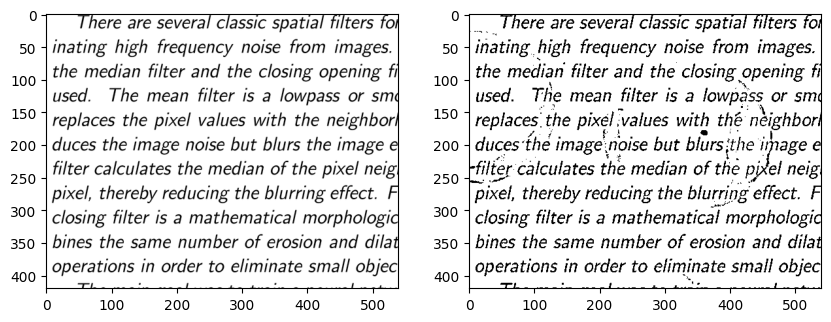

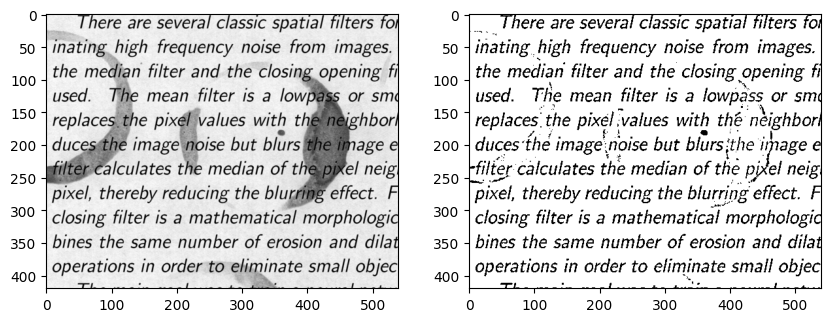

In [ ]:
plot_image(image_c, denoised_image)
plot_image(image_d, denoised_image)

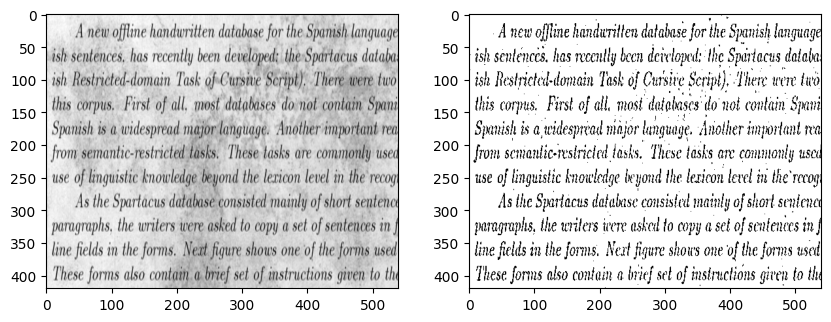

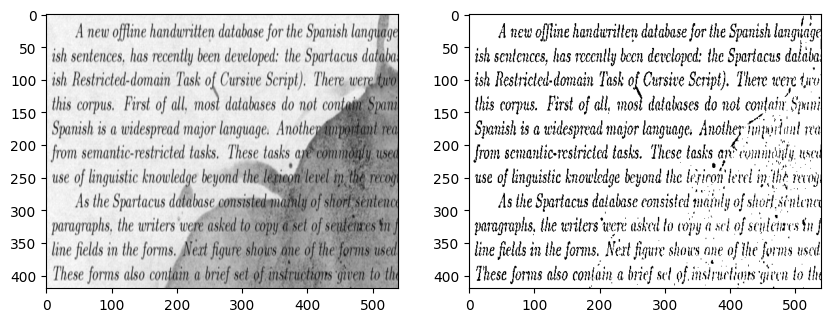

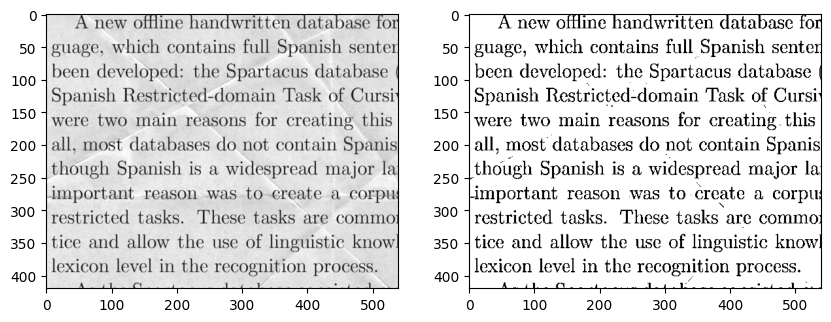

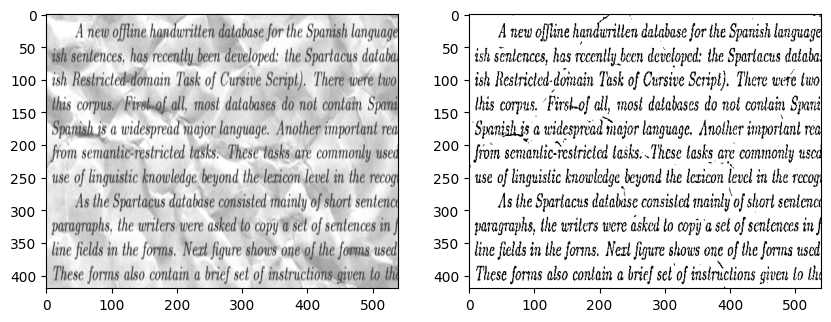

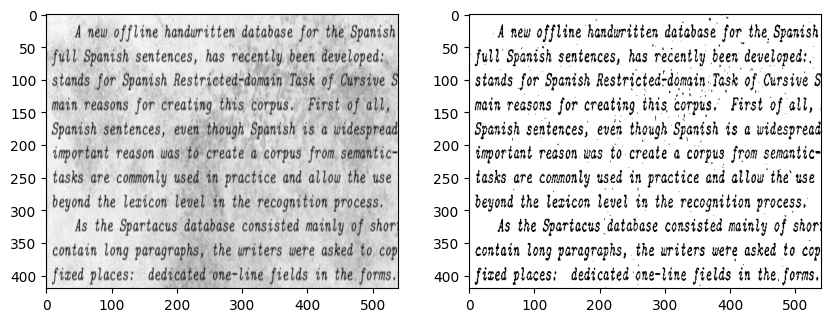

In [ ]:
# denoising the images
for i in range(5):
  denoised_img = thresholding(test_images[i]);
  plot_image(test_images[i], denoised_img)

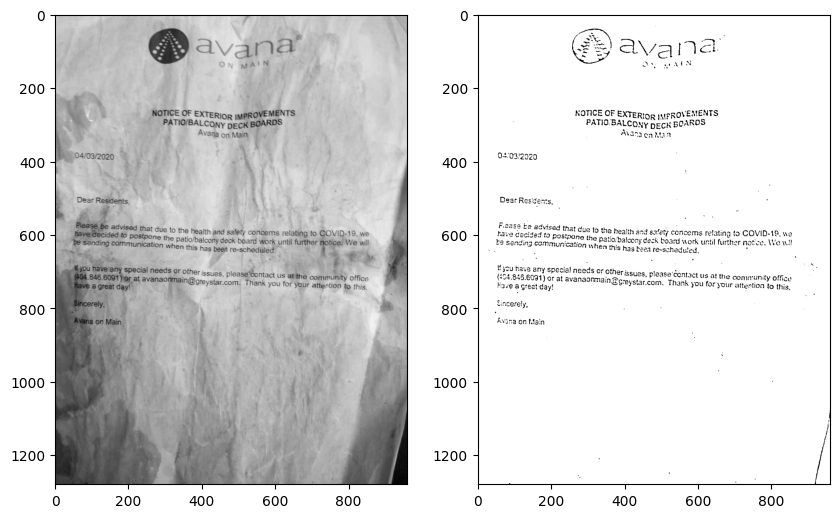

In [33]:
# denoising the live image
noisy_image = cv2.imread('/content/drive/MyDrive/Project/Data/Dataset/newImg.jpeg', cv2.IMREAD_GRAYSCALE)
denoised_image = thresholding(noisy_image)
plot_image(noisy_image, denoised_image)